<a href="https://colab.research.google.com/github/Cathidumi/fmi_ufpa/blob/main/Discrepante_Oficial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv('dados_new.csv')

#Temperatura

In [ ]:
dados_new = dados

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


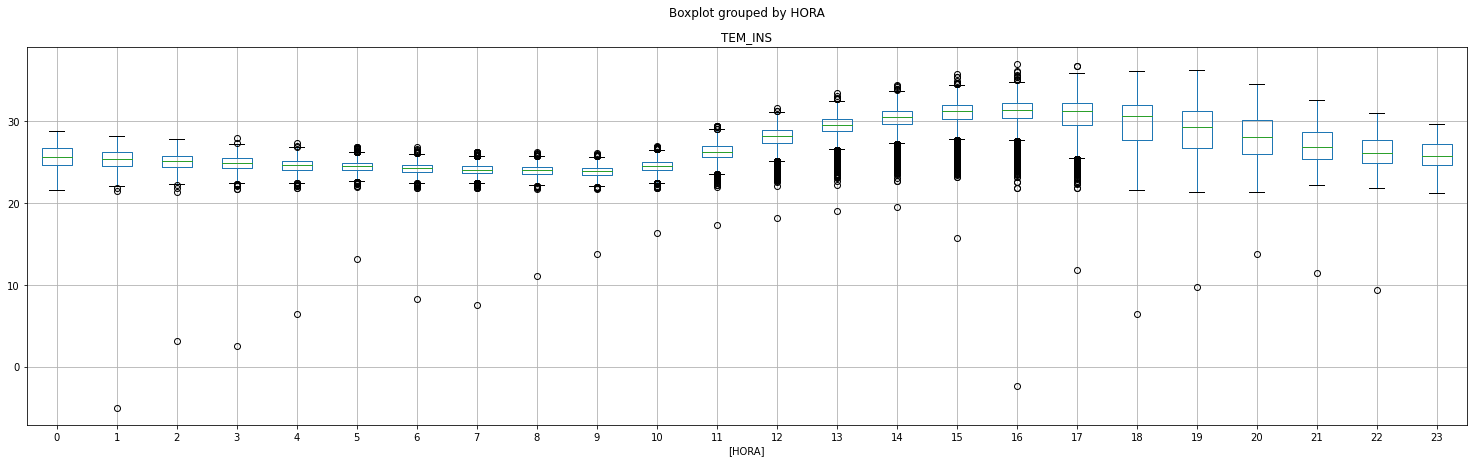

In [ ]:
plt.rc('figure', figsize = (25, 7))

dados.boxplot(['TEM_INS'], by = ['HORA'])

In [ ]:
temp_hr = dados.groupby('HORA')['TEM_INS']

In [ ]:
Q1 =  temp_hr.quantile(.25)
Q3 =  temp_hr.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
dados_new = pd.DataFrame()
for hora in temp_hr.groups.keys():
  tipo = dados['HORA'] == hora
  limite = (dados['TEM_INS'] >= limite_inferior[hora]) & (dados['TEM_INS'] <= limite_superior[hora])
  selecao = tipo & limite
  dados_selecao = dados[selecao]
  dados_new = pd.concat([dados_new, dados_selecao])


In [ ]:
dados_new.sort_index(inplace = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


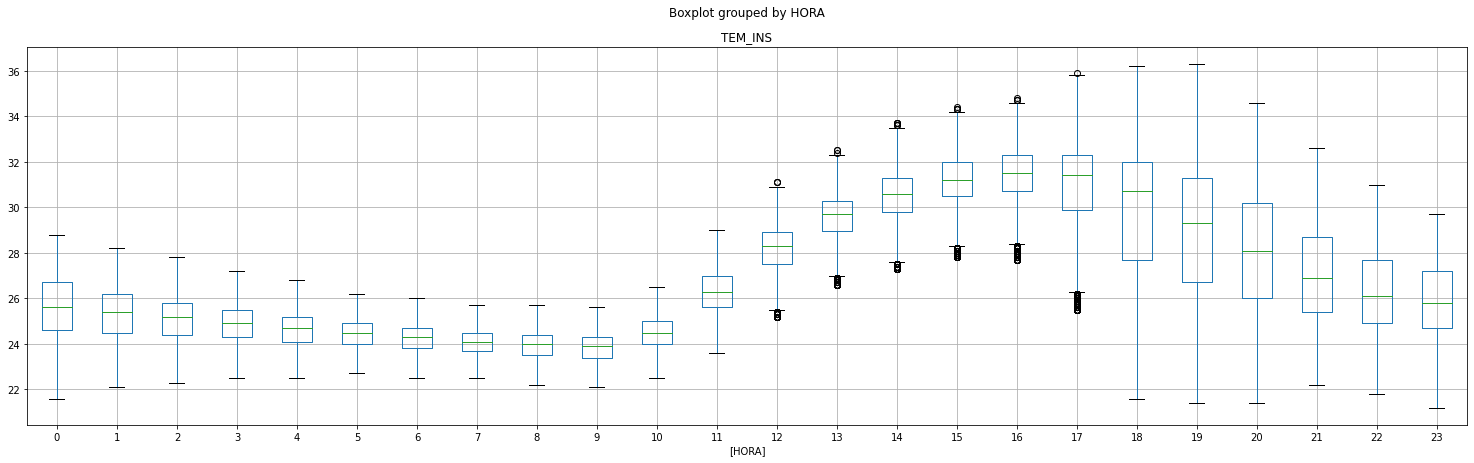

In [ ]:
dados_new.boxplot(['TEM_INS'], by = ['HORA'])

#Velocidade do vento

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


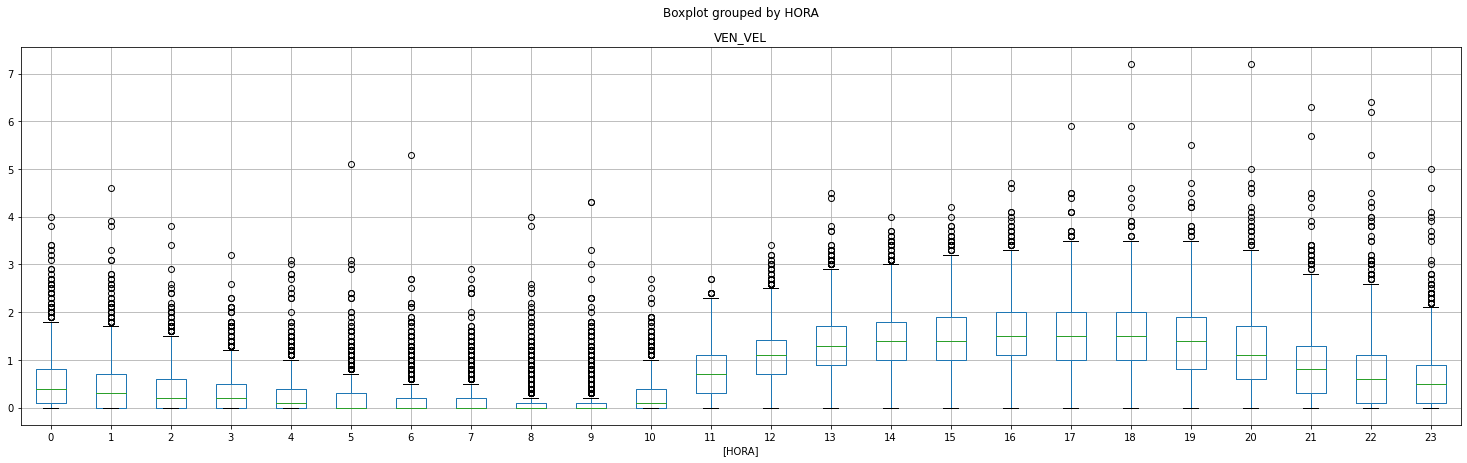

In [ ]:
dados.boxplot(['VEN_VEL'], by = ['HORA'])

In [ ]:
vel_hr = dados.groupby('HORA')['VEN_VEL']

In [ ]:
Q1 =  vel_hr.quantile(.25)
Q3 =  vel_hr.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
dados_new2 = pd.DataFrame()
for hora in vel_hr.groups.keys():
  tipo = dados['HORA'] == hora
  limite = (dados['VEN_VEL'] >= limite_inferior[hora]) & (dados['VEN_VEL'] <= limite_superior[hora])
  selecao = tipo & limite
  dados_selecao = dados[selecao]
  dados_new2 = pd.concat([dados_new2, dados_selecao])


In [ ]:
dados_new2.sort_index(inplace = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


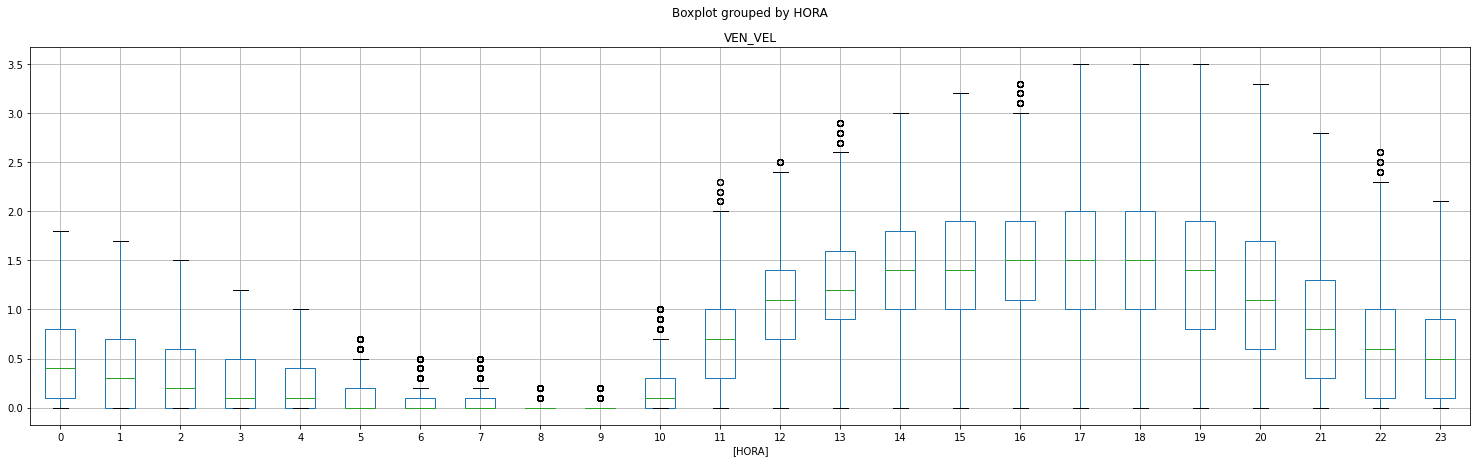

In [ ]:
dados_new2.boxplot(['VEN_VEL'], by = ['HORA'])

#Umidade do ar

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


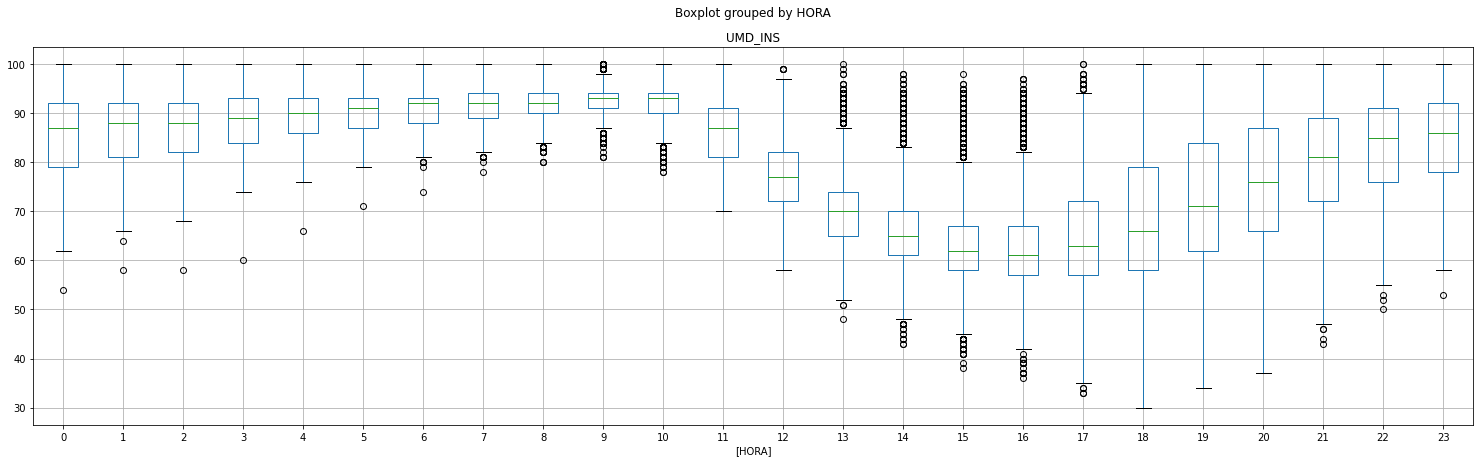

In [ ]:
dados.boxplot(['UMD_INS'], by = ['HORA'])

In [ ]:
umd_hr = dados.groupby('HORA')['UMD_INS']

In [ ]:
Q1 =  umd_hr.quantile(.25)
Q3 =  umd_hr.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
dados_new3 = pd.DataFrame()
for hora in vel_hr.groups.keys():
  tipo = dados['HORA'] == hora
  limite = (dados['UMD_INS'] >= limite_inferior[hora]) & (dados['UMD_INS'] <= limite_superior[hora])
  selecao = tipo & limite
  dados_selecao = dados[selecao]
  dados_new3 = pd.concat([dados_new3, dados_selecao])


In [ ]:
dados_new3.sort_index(inplace = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


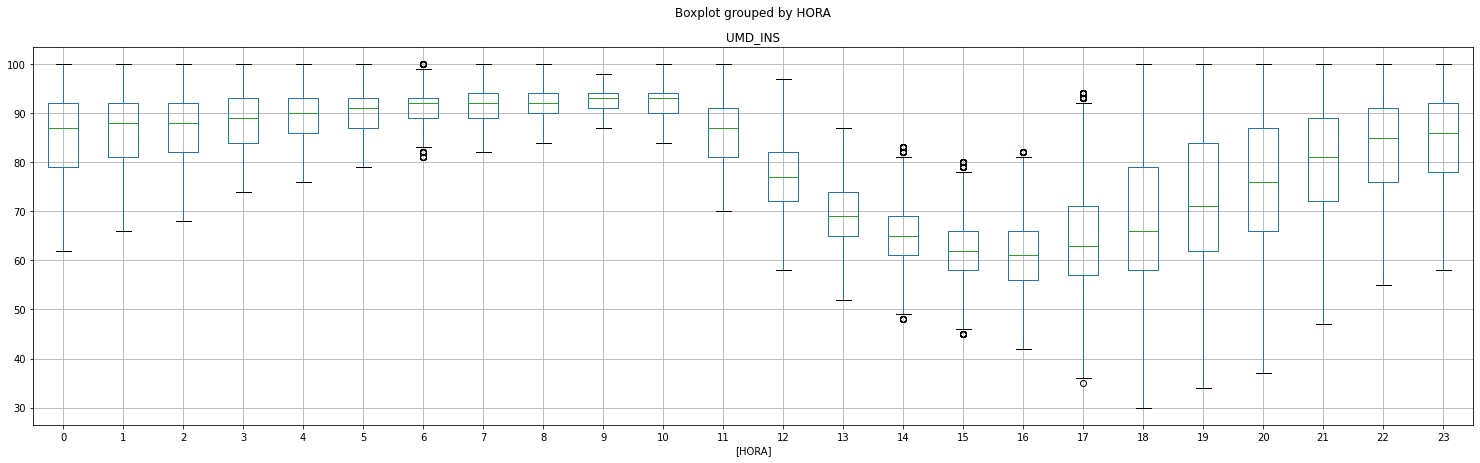

In [ ]:
dados_new3.boxplot(['UMD_INS'], by = ['HORA'])

#Concatenando

In [ ]:
dados.head()

,INS,VEN_VEL,UMD_INS,TEM_INS,DAT_MED,HR_MED,HORA
0,2012-01-01 00:00:00,1.1,81.0,26.6,01/01/2012,0,0
1,2012-01-01 01:00:00,0.8,81.0,26.3,01/01/2012,100,1
2,2012-01-01 02:00:00,0.7,82.0,26.2,01/01/2012,200,2
3,2012-01-01 03:00:00,0.2,83.0,26.0,01/01/2012,300,3
4,2012-01-01 04:00:00,0.7,85.0,25.6,01/01/2012,400,4


In [ ]:
dados = pd.concat([dados[['INS', 'DAT_MED', 'HR_MED', 'HORA']], dados_new[['TEM_INS']], dados_new2[['VEN_VEL']], dados_new3[['UMD_INS']]], axis=1)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


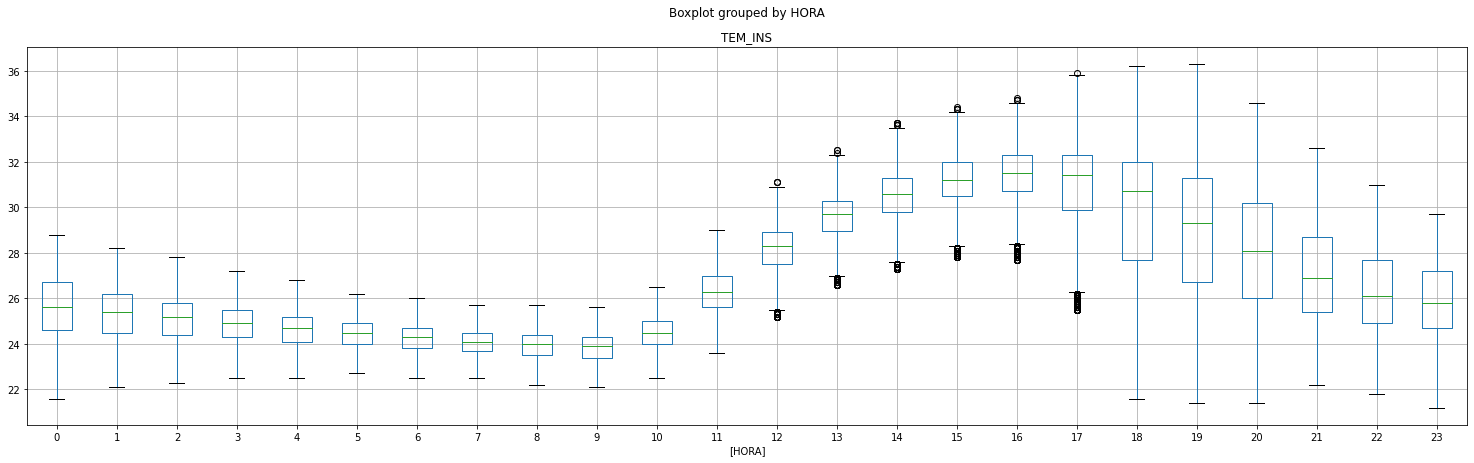

In [ ]:
dados.boxplot(['TEM_INS'], by = ['HORA'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


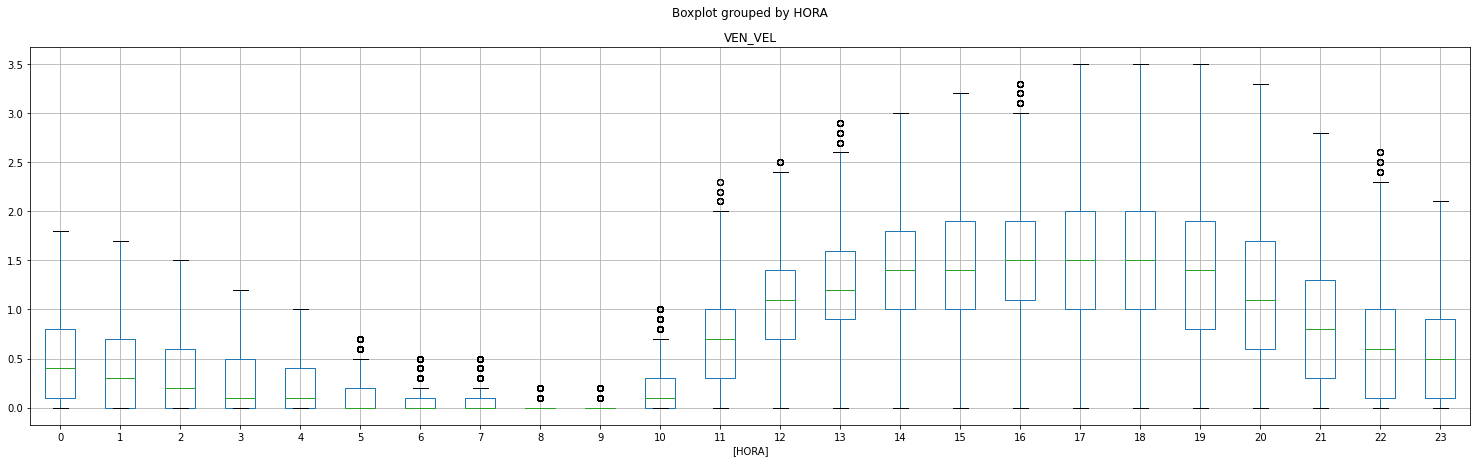

In [ ]:
dados.boxplot(['VEN_VEL'], by = ['HORA'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


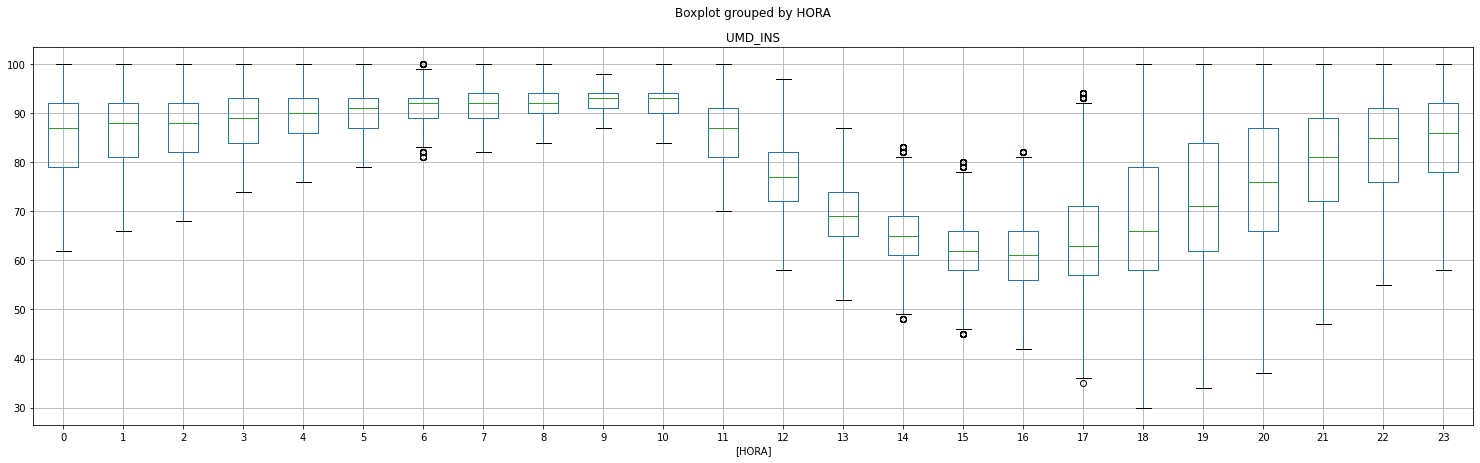

In [ ]:
dados.boxplot(['UMD_INS'], by = ['HORA'])

#Exportando dados

In [ ]:
dados.to_csv('dados_new2.csv', index = False)

In [ ]:
df = pd.read_csv('dados_new2.csv')
df

,INS,DAT_MED,HR_MED,HORA,TEM_INS,VEN_VEL,UMD_INS
0,2012-01-01 00:00:00,01/01/2012,0,0,26.6,1.1,81.0
1,2012-01-01 01:00:00,01/01/2012,100,1,26.3,0.8,81.0
2,2012-01-01 02:00:00,01/01/2012,200,2,26.2,0.7,82.0
3,2012-01-01 03:00:00,01/01/2012,300,3,26.0,0.2,83.0
4,2012-01-01 04:00:00,01/01/2012,400,4,25.6,0.7,85.0
...,...,...,...,...,...,...,...
88075,2022-01-17 19:00:00,17/01/2022,1900,19,28.2,0.0,86.0
88076,2022-01-17 20:00:00,17/01/2022,2000,20,29.4,0.0,79.0
88077,2022-01-17 21:00:00,17/01/2022,2100,21,27.1,0.0,84.0
88078,2022-01-17 22:00:00,17/01/2022,2200,22,25.6,0.0,92.0
